In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from time_contracts import *
from itertools import product
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns
from matplotlib.patches import Rectangle

In [2]:
np.set_printoptions(precision=3)
psi = 0.49
alpha_d = 11
G, W, L =  general_contracts(my_print=True)

G
[[0.291 0.405 0.605]
 [0.314 0.428 0.628]
 [0.354 0.468 0.668]]

W
[ 4.715  6.999 12.336]

L
[1.857 3.    5.667]


In [3]:
G_t, W_t, L_t = general_contracts(monotonicity=True)
G_f, W_f, L_f = general_contracts(monotonicity=False)

print("Monotonicity constraints")
print(np.mean(np.abs(G_t-G_f)))
print(np.mean(np.abs(W_t-W_f)))
print(np.mean(np.abs(L_t-L_f)))

Monotonicity constraints
1.551939467589161e-05
0.0017188474536240506
9.012981590876083e-05


In [4]:
G_all, W_all, L_all = general_contracts(IC = "all"        , monotonicity=False)
G_neq, W_neq, L_neq = general_contracts(IC = "neq"        , monotonicity=False)
G_ort, W_ort, L_ort = general_contracts(IC = "ort"        , monotonicity=False)
G_ort_d, W_ort_d, L_ort_d = general_contracts(IC = "ort_d", monotonicity=False)
G_ort_l, W_ort_l, L_ort_l = general_contracts(IC = "ort_l", monotonicity=False)

G_fall,   W_fall,   L_fall   = general_contracts(IR = "fst", IC = "all"  , monotonicity=False)
G_fneq,   W_fneq,   L_fneq   = general_contracts(IR = "fst", IC = "neq"  , monotonicity=False)
G_fort,   W_fort,   L_fort   = general_contracts(IR = "fst", IC = "ort"  , monotonicity=False)
G_fort_d, W_fort_d, L_fort_d = general_contracts(IR = "fst", IC = "ort_d", monotonicity=False)
G_fort_l, W_fort_l, L_fort_l = general_contracts(IR = "fst", IC = "ort_l", monotonicity=False)

print(f"A All   MAE: G: {np.mean(np.abs(G_all-G_t))}, W: {np.mean(np.abs(W_all-W_t))}, L: {np.mean(np.abs(L_all-L_t))}")
print(f"A Neq   MAE: G: {np.mean(np.abs(G_neq-G_t))}, W: {np.mean(np.abs(W_neq-W_t))}, L: {np.mean(np.abs(L_neq-L_t))}")
print(f"A Ort   MAE: G: {np.mean(np.abs(G_ort-G_t))}, W: {np.mean(np.abs(W_ort-W_t))}, L: {np.mean(np.abs(L_ort-L_t))}")
print(f"A Ort_d MAE: G: {np.mean(np.abs(G_ort_d-G_t))}, W: {np.mean(np.abs(W_ort_d-W_t))}, L: {np.mean(np.abs(L_ort_d-L_t))}")
print(f"A Ort_l MAE: G: {np.mean(np.abs(G_ort_l-G_t))}, W: {np.mean(np.abs(W_ort_l-W_t))}, L: {np.mean(np.abs(L_ort_l-L_t))}")
print()
print(f"F All   MAE: G: {np.mean(np.abs(G_fall-G_t))}, W: {  np.mean(np.abs(W_fall-W_t))}, L: {  np.mean(np.abs(L_fall-L_t))}")
print(f"F Neq   MAE: G: {np.mean(np.abs(G_fneq-G_t))}, W: {  np.mean(np.abs(W_fneq-W_t))}, L: {  np.mean(np.abs(L_fneq-L_t))}")
print(f"F Ort   MAE: G: {np.mean(np.abs(G_fort-G_t))}, W: {  np.mean(np.abs(W_fort-W_t))}, L: {  np.mean(np.abs(L_fort-L_t))}")
print(f"F Ort_d MAE: G: {np.mean(np.abs(G_fort_d-G_t))}, W: {np.mean(np.abs(W_fort_d-W_t))}, L: {np.mean(np.abs(L_fort_d-L_t))}")
print(f"F Ort_l MAE: G: {np.mean(np.abs(G_fort_l-G_t))}, W: {np.mean(np.abs(W_fort_l-W_t))}, L: {np.mean(np.abs(L_fort_l-L_t))}")

A All   MAE: G: 1.551939467589161e-05, W: 0.0017188474536240506, L: 9.012981590876083e-05
A Neq   MAE: G: 1.551939467589161e-05, W: 0.0017188474536240506, L: 9.012981590876083e-05
A Ort   MAE: G: 1.5566907544549578e-05, W: 0.0016312263100080788, L: 7.605745003351021e-05
A Ort_d MAE: G: 1.2061455442759063e-05, W: 0.0014501374421191926, L: 0.00018150825933482828
A Ort_l MAE: G: 2.6523437083727755e-05, W: 0.0014614909924501873, L: 0.00026120874141703315

F All   MAE: G: 1.5646667706654187e-05, W: 0.0017786212116120599, L: 8.331221562844308e-05
F Neq   MAE: G: 1.5646667706654187e-05, W: 0.0017786212116120599, L: 8.331221562844308e-05
F Ort   MAE: G: 1.5854377753662014e-05, W: 0.0013650801333249991, L: 0.00010053808892999487
F Ort_d MAE: G: 7.138370754870375e-06, W: 0.0005884529550611953, L: 6.070611327217238e-05
F Ort_l MAE: G: 2.2786507854335695e-05, W: 0.001391405007450904, L: 0.00019962299686119658


In [5]:
print("Contracts (g_i,j; w_i; l_j):")
for i, w in enumerate(W):
    for j, l in enumerate(L):
        print(f"g_{i+1},{j+1}; w_{i+1}; j_{j+1}: ({G[i,j]:.3f}, {w:.3f}, {l:.3f})")

Contracts (g_i,j; w_i; l_j):
g_1,1; w_1; j_1: (0.291, 4.715, 1.857)
g_1,2; w_1; j_2: (0.405, 4.715, 3.000)
g_1,3; w_1; j_3: (0.605, 4.715, 5.667)
g_2,1; w_2; j_1: (0.314, 6.999, 1.857)
g_2,2; w_2; j_2: (0.428, 6.999, 3.000)
g_2,3; w_2; j_3: (0.628, 6.999, 5.667)
g_3,1; w_3; j_1: (0.354, 12.336, 1.857)
g_3,2; w_3; j_2: (0.468, 12.336, 3.000)
g_3,3; w_3; j_3: (0.668, 12.336, 5.667)


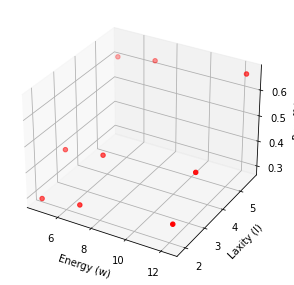

In [6]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
xs = []
ys = []
zs = []
for i in range(len(W)):
    for j in range(len(L)):
        xs.append(W[i])
        ys.append(L[j])
        zs.append(G[i,j])
ax1.scatter(xs, ys, zs, c='r', marker='o')
ax1.set_xlabel("Energy (w)")
ax1.set_ylabel("Laxity (l)")
ax1.set_zlabel("Payoff (g)")
fig1.tight_layout()


Text(0.5, 0, 'Payoff (g)')

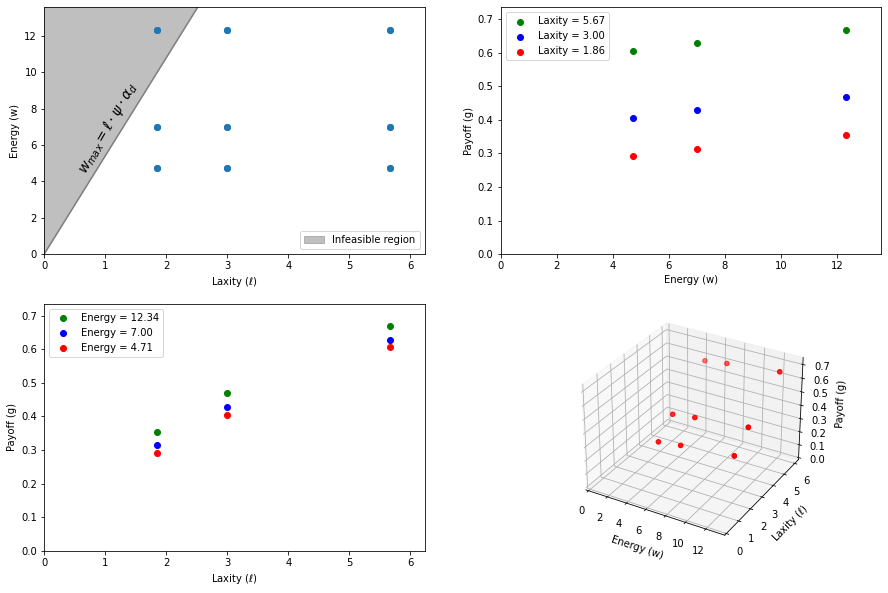

In [7]:
fig1 = plt.figure(figsize = (15,10))
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)
ax4 = fig1.add_subplot(2,2,4, projection='3d')
colors = ['r', 'b', 'g', 'y', 'k']
max_g = np.max(G)
max_w = np.max(W)
max_l = np.max(L)  

for i in range(len(W)):
    for j in range(len(L)):
        xs.append(W[i])
        ys.append(L[j])
        zs.append(G[i,j])

l_hat = np.arange(0, max_l*1.1, 0.1)
w_hat = l_hat * psi * alpha_d
w_max = np.max(w_hat)*np.ones(len(w_hat))
ax1.plot(l_hat, w_hat, color='grey')
ax1.fill_between(l_hat, w_hat, w_max, color='grey', alpha=0.5, label="Infeasible region")
ax1.scatter(ys, xs)
ax1.set_xlim(0, max_l*1.1)
ax1.set_ylim(0, max_w*1.1)
ax1.set_xlabel(r"Laxity ($\ell$)")
ax1.set_ylabel("Energy (w)")
ax1.text(0.5, 4.5, r"$w_{max} = \ell \cdot \psi \cdot \alpha_d$", fontsize=14, rotation=60)
ax1.legend()

for j in range(len(L)):
    gp = G[:,j]
    ax2.scatter(W, gp, color = colors[j], label = f"Laxity = {L[j]:.2f}")
ax2.set_xlim(0, max_w*1.1)
ax2.set_ylim(0, max_g*1.1)
ax2.set_xlabel("Energy (w)")
ax2.set_ylabel("Payoff (g)")

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[::-1], labels[::-1])

for i in range(len(W)):
    gp = G[i,:]
    ax3.scatter(L, gp, color = colors[i], label = f"Energy = {W[i]:.2f}")
ax3.set_xlim(0, max_l*1.1)
ax3.set_ylim(0, max_g*1.1)
ax3.set_xlabel(r"Laxity ($\ell$)")
ax3.set_ylabel("Payoff (g)")

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1])


ax4.scatter(xs, ys, zs, c='r', marker='o')
ax4.set_xlim(0, max_w*1.1)
ax4.set_ylim(0, max_l*1.1)
ax4.set_zlim(0, max_g*1.1)
ax4.set_xlabel("Energy (w)")
ax4.set_ylabel(r"Laxity ($\ell$)")
ax4.set_zlabel("Payoff (g)")

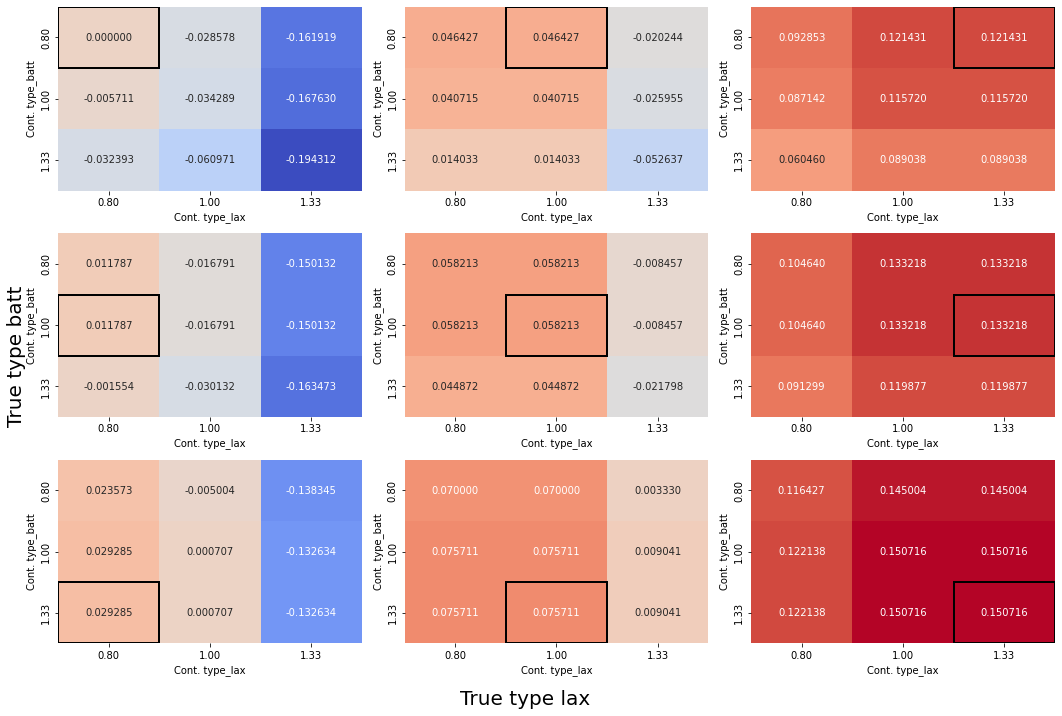

In [13]:
ev_utility = np.zeros((len(W), len(L), len(W), len(L)))
types_i = [1/1.25, 1/1, 1/0.75]
types_j = [1/1.25, 1/1, 1/0.75]
c1 = 0.01
c2 = 0.1

for i, true_i in enumerate(types_i):
    for j, true_j in enumerate(types_j):
        for ip in range(len(types_i)):
            for jp in range(len(types_j)):
                ev_utility[i,j,ip,jp] = G[ip, jp] - c1 * W[ip] / true_i - c2 * L[jp] / true_j

vmin = np.min(ev_utility)
vmax = np.max(ev_utility)
fig1 = plt.figure(figsize = (15,10))
axs = fig1.subplots(len(W), len(L))

for i, true_i in enumerate(types_i):
    for j, true_j in enumerate(types_j):
        sns.heatmap(ev_utility[i,j,:,:], ax = axs[i,j], vmin=vmin, vmax=vmax, cbar=False, annot=True, fmt=".6f", cmap="coolwarm")
        axs[i,j].add_patch(Rectangle((j,i),1,1, fill=False, edgecolor="black", lw=2))
        axs[i,j].set_xlabel("Cont. type_lax")
        axs[i,j].set_ylabel("Cont. type_batt")
        xticks = axs[i,j].get_xticks()
        axs[i,j].set_xticks(xticks)
        axs[i,j].set_xticklabels([f"{x:.2f}" for x in types_j])
        yticks = axs[i,j].get_yticks()
        axs[i,j].set_yticks(yticks)
        axs[i,j].set_yticklabels([f"{y:.2f}" for y in types_i])

fig1.supxlabel("True type lax", fontsize = 20)
fig1.supylabel("True type batt", fontsize = 20)
fig1.tight_layout()


## Time comparison

In [17]:
import time
time_compare = True

In [19]:
time_nontract = []
time_tract = []
err_G = []
err_W = []
err_L = []
list_n = []
num_trials = 5
if time_compare:
    for n in tqdm(range(2,10)):
        for trial in range(num_trials):
            types_i = np.linspace(0.5, 2, n, endpoint=True)
            types_j = np.linspace(0.5, 2, n, endpoint=True)
            nontract_s = time.time()
            G_a, W_a, L_a = general_contracts(thetas_i = types_i, thetas_j = types_j, monotonicity=True)
            nontract_e = time.time()

            tract_s = time.time()
            G_x, W_x, L_x = general_contracts(thetas_i = types_i, thetas_j = types_j, IR = "fst", IC = "ort_l", monotonicity=False)
            tract_e = time.time()

            time_nontract.append(nontract_e - nontract_s)
            time_tract.append(tract_e - tract_s)
            err_G.append(np.mean(np.abs(G_a - G_x)))
            err_W.append(np.mean(np.abs(W_a - W_x)))
            err_L.append(np.mean(np.abs(L_a - L_x)))
            list_n.append(n)

  0%|          | 0/8 [00:00<?, ?it/s]

In [21]:
if time_compare:
    df_timetrial = pd.DataFrame(data  = np.array([list_n, time_nontract, time_tract, err_G, err_W, err_L]).T,
                                columns = ["n", "time_nontract", "time_tract", "err_G", "err_W", "err_L"])
    df_timetrial.to_csv("./data/timetrial.csv", index=False)
else:
    df_timetiral = pd.read_csv("./data/timetrial.csv")
df_timetrial.describe()

,n,time_nontract,time_tract,err_G,err_W,err_L
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,5.500000,8.714317,0.460366,0.000014,0.001035,0.000200
std,2.320477,9.588571,0.294902,0.000014,0.000983,0.000253
min,2.000000,0.096814,0.052798,0.000001,0.000115,0.000011
25%,3.750000,0.963941,0.164470,0.000005,0.000493,0.000063
50%,5.500000,4.912089,0.436916,0.000009,0.000695,0.000113
75%,7.250000,13.498118,0.696365,0.000016,0.001122,0.000191
max,9.000000,28.831125,1.004117,0.000046,0.003253,0.000840


In [22]:
gdf_timetrial = df_timetrial.groupby("n").agg(nontract_avg = ("time_nontract", np.mean),
                                              nontract_std = ("time_nontract", np.std),
                                              tract_avg = ("time_tract", np.mean),
                                              tract_std = ("time_tract", np.std),
                                              err_G_avg = ("err_G", np.mean),
                                              err_G_std = ("err_G", np.std),
                                              err_W_avg = ("err_W", np.mean),
                                              err_W_std = ("err_W", np.std),
                                              err_L_avg = ("err_L", np.mean),
                                              err_L_std = ("err_L", np.std)
                                              ).reset_index()
gdf_timetrial["num"] = gdf_timetrial["n"]**2

In [23]:
gdf_timetrial.head(20)

,n,nontract_avg,nontract_std,tract_avg,tract_std,err_G_avg,err_G_std,err_W_avg,err_W_std,err_L_avg,err_L_std,num
0,2.0,0.122704,0.033981,0.060549,0.009867,0.000046,0.0,0.001840,0.0,0.000840,0.0,4.0
1,3.0,0.468612,0.033096,0.117415,0.008296,0.000024,0.0,0.003253,0.0,0.000183,0.0,9.0
2,4.0,1.350449,0.181893,0.253593,0.080277,0.000001,0.0,0.000115,0.0,0.000011,0.0,16.0
3,5.0,3.228887,0.288755,0.419653,0.043756,0.000009,0.0,0.000674,0.0,0.000089,0.0,25.0
4,6.0,6.613956,0.321904,0.540427,0.122135,0.000004,0.0,0.000218,0.0,0.000064,0.0,36.0
5,7.0,11.255694,0.606976,0.621604,0.056182,0.000014,0.0,0.000717,0.0,0.000217,0.0,49.0
6,8.0,18.251605,0.548687,0.735568,0.030209,0.000006,0.0,0.000882,0.0,0.000059,0.0,64.0
7,9.0,28.422631,0.255849,0.934122,0.048257,0.000010,0.0,0.000584,0.0,0.000136,0.0,81.0


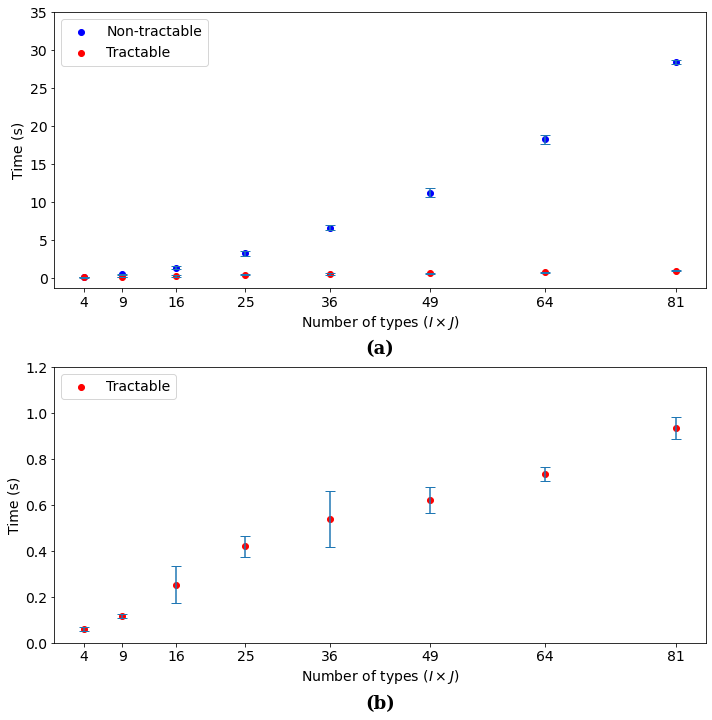

In [67]:
fig1 = plt.figure(figsize = (10,10))
ax1 = fig1.add_subplot(2,1,1)
ax2 = fig1.add_subplot(2,1,2)

ax1.scatter(gdf_timetrial["num"], gdf_timetrial["nontract_avg"], label = "Non-tractable", color="blue")
ax1.scatter(gdf_timetrial["num"], gdf_timetrial["tract_avg"], label = "Tractable", color="red")

ax1.errorbar(gdf_timetrial["num"], gdf_timetrial["nontract_avg"], yerr = gdf_timetrial["nontract_std"], fmt = "none", capsize = 5)
ax1.errorbar(gdf_timetrial["num"], gdf_timetrial["tract_avg"],    yerr = gdf_timetrial["tract_std"],    fmt = "none", capsize = 5)

ax1.set_xticks(gdf_timetrial["num"])
ax1.set_xticklabels([f"{x:.0f}" for x in gdf_timetrial["num"]], fontsize = 14)

y_ticks = ax1.get_yticks()[1:]
ax1.set_yticks(y_ticks)
ax1.set_yticklabels([f"{y:.0f}" for y in y_ticks], fontsize = 14)

ax1.set_ylabel("Time (s)", fontsize = 14)
ax1.set_xlabel(r"Number of types ($I \times J$)", fontsize = 14)

ax1.legend(fontsize = 14, loc="upper left")
ax1.set_title("(a)", family = "serif", fontweight = "bold", fontsize = 18, y = -0.26)
#ax2.set_title(f"(b4)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.22)


ax2.scatter(gdf_timetrial["num"], gdf_timetrial["tract_avg"], label = "Tractable", color="red")
ax2.errorbar(gdf_timetrial["num"], gdf_timetrial["tract_avg"],    yerr = gdf_timetrial["tract_std"],  fmt = "none", capsize = 5)
ax2.set_xticks(gdf_timetrial["num"])
ax2.set_xticklabels([f"{x:.0f}" for x in gdf_timetrial["num"]], fontsize = 14)
y_ticks = ax2.get_yticks()#[1:]
ax2.set_yticks(y_ticks)
ax2.set_yticklabels([f"{y:.1f}" for y in y_ticks], fontsize = 14)
ax2.set_ylabel("Time (s)", fontsize = 14)
ax2.set_xlabel(r"Number of types ($I \times J$)", fontsize = 14)
ax2.legend(fontsize = 14, loc="upper left")

ax2.set_title("(b)", family = "serif", fontweight = "bold", fontsize = 18, y = -0.26)

fig1.tight_layout()
fig1.savefig("./../figs/contracts_timetrial.pdf", dpi = 600, bbox_inches = "tight")